In [74]:
import numpy as np
import scipy.fft as fft
import scipy.signal as signal
from scipy.linalg import norm 
from scipy.signal import TransferFunction as tf
import matplotlib.pyplot as plt
%matplotlib inline

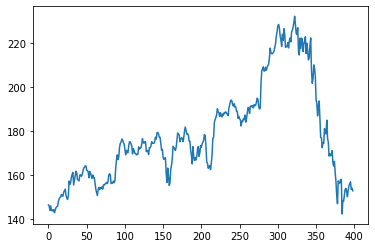

In [75]:
import csv
stock_dates = []
stock_prices  = []
with open('AAPL.csv', mode='r') as raw_data:
    csv_reader = csv.DictReader(raw_data)
    for row in csv_reader:
        data = row['Close']
        if not data == 'null':
            stock_prices.append(float(data))
            stock_dates.append(row['Date'])
stock_prices = np.array(stock_prices)

# 400 most recent days
start = -400
end = -1
raw_data = stock_prices
data = raw_data[start:end]
plt.plot(data)

In [76]:

#finds the frequency band that contains the given energy
def band(Pxx, E):
    n = 0
    En = 0
    while En < E:
        En += Pxx[n]
        n += 1
    return n

1.0000000000000007
0.02734375


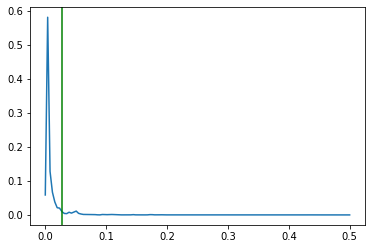

In [77]:
Ep = 0.9 #percent energy band

freqs, psd = signal.welch(data)
psd = psd/norm(psd, 1)
print(sum(psd))
b = freqs[band(psd, Ep)]

#"""
plt.figure()
plt.plot(freqs, psd)
plt.axvline(b, color='green') # cutoff frequency
#"""

"""
plt.figure()
f, Pxx_spec = signal.welch(data)
plt.plot(f, Pxx_spec)
"""

print(b)


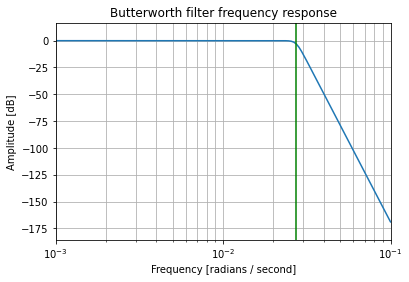

In [78]:
N = 15
W = b
b, a = signal.butter(N, W, 'low', 'ba')
w, h = signal.freqs(b, a, len(freqs))

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(W, color='green') # cutoff frequency
plt.show()



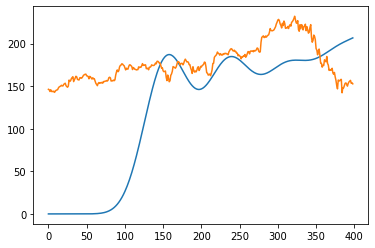

In [79]:
sos = signal.butter(N, W, 'low', output='sos')
filtered = signal.sosfilt(sos, data)
plt.plot(filtered)
plt.plot(data)

In [80]:
L = round(np.sqrt(0.196202+(W/(2*np.pi))**2)/(W/(2*np.pi)))
print("MA length for {}%: {}".format(Ep*100, L))



MA length for 90.0%: 102


In [81]:
"""
sys = signal.TransferFunction(num, den)
T, yout, xout = signal.lsim(sys, data, np.arange(len(data)))
plt.plot(T, yout)
"""

'\nsys = signal.TransferFunction(num, den)\nT, yout, xout = signal.lsim(sys, data, np.arange(len(data)))\nplt.plot(T, yout)\n'